In [287]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [288]:
Train_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRTK2NvcndgPX41Czu6Ft2Ho_nE-z50BgTqdzwFW0rsJ2nvyNLe2DoIg1COzUbgw80oaRBjfy5-WtFk/pubhtml"

In [289]:
# getting the Training data
rs=requests.get(Train_url)
print(rs.status_code)

r=rs.text
shoop = BeautifulSoup(r)
s = shoop.find('table', {'class':'waffle'})
tr = s.find_all('tr')

y = []
x = [0,0]
for i in tr:
    x=i.find_all('td',{'class':'s1'})
    if len(x)>1:
        y.append({
            'x':int(x[0].text.strip()),
            'y':x[1].text.strip()
        })
df = pd.DataFrame(y)

df['y'] = pd.to_numeric(df['y'])

df.to_csv('data/Train.csv',index=False)
print("file save Train.csv")

200
file save Train.csv


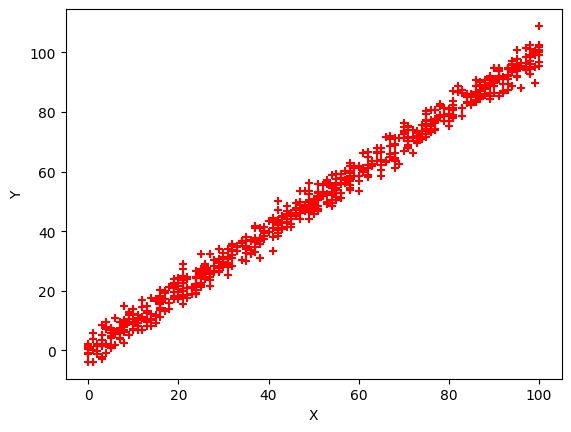

In [290]:
# plot graph to see datapoint
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(df["x"],df["y"],color='red',marker='+')
plt.show()

In [291]:
#split the data
x_train = df
y_train = df['y']
x_train.drop('y',axis=1,inplace=True)

In [292]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [293]:
#Now fatch the test data

In [294]:
test_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRyvZ7lknwiSghK9aen1SaTEYoN3JS40rrGLpcyrsVZy1tB2T4gn6Y3-cdzPUFCPMmmqREWefW3kl4_/pubhtml"

In [295]:

rs=requests.get(test_url)
print(rs.status_code)

r=rs.text
shoop = BeautifulSoup(r)
s = shoop.find('table', {'class':'waffle'})
tr = s.find_all('tr')

y = []
for i in tr:
    x=i.find_all('td',{'class':'s1'})
    if len(x)>1:
        y.append({
            'x':int(x[0].text.strip()),
            'y':x[1].text.strip()
        })
test_df = pd.DataFrame(y)
test_df['y'] = pd.to_numeric(test_df['y'])

test_df.to_csv('data/test.csv',index=False)
print("file save test.csv")

200
file save test.csv


In [296]:
#split the data
x_test = test_df
y_test = test_df['y']
x_test.drop('y',axis=1,inplace=True)

In [297]:
#predict the test value
y_pre = model.predict(x_test)

In [298]:
print(f"accuracy of model is {model.score(x_test,y_pre)*100}")

accuracy of model is 100.0


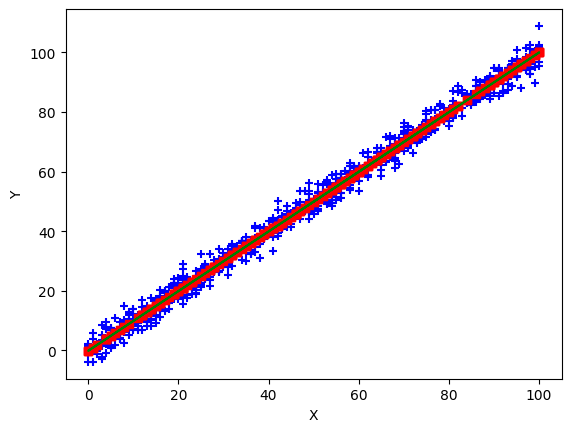

In [299]:
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_train,y_train,color='Blue',marker='+')
plt.plot(x_test,y_pre,'rs',label="user prediction")
plt.plot(x_test,y_pre,color='Green')
plt.show()